Este agarra los datos del csv con la matriz de grayscale de cada espectrograma, y se los pasa al modelo de CNN de PyTorch (definido en aux file models.py), los guarda para poder llamarlo sin re-entrenar desde otros archivos

In [21]:
import os, sys
import pandas as pd
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import torch.nn.functional as F

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from utils import util, models

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
if device.type == 'cuda':
    print(torch.cuda.get_device_name(device))
else:
    print("CUDA not available")

Using device: cuda
NVIDIA GeForce RTX 5080


In [23]:
# UNCOMMENT THE ONE BEING USED

# NOT NOISE-REDUCED
df = pd.read_csv(os.path.join('..', 'database', 'meta', 'final', 'train_data.csv'))

# NOISE-REDUCED
# df = pd.read_csv(os.path.join('..', 'database', 'meta', 'final', 'train_data2.csv'))

In [24]:
# Extract labels and pixel values
labels = df['label'].values.astype(np.int64)
features = df.drop(columns=['label']).values.astype(np.float32)
features /= 255.0
features = features.reshape(-1, 1, 313, 224)

print("features shape:", features.shape)
print("labels shape:", labels.shape)

features shape: (1966, 1, 313, 224)
labels shape: (1966,)


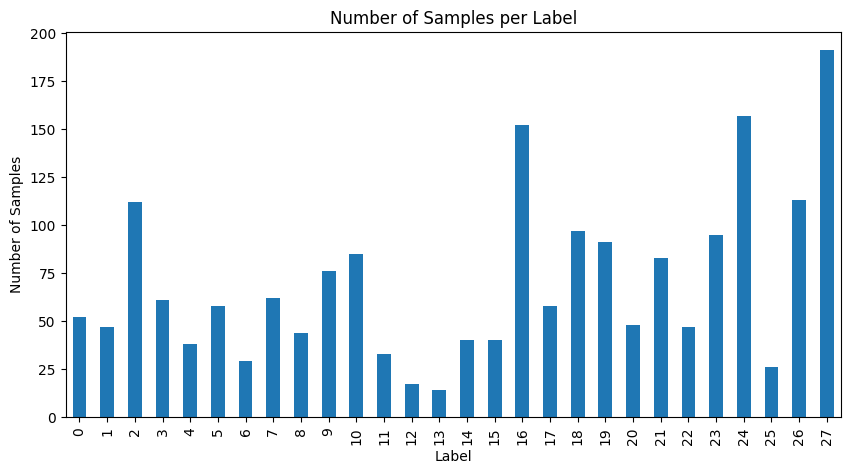

In [25]:
plt.figure(figsize=(10, 5))
df['label'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Label')
plt.show()

In [26]:
import importlib
importlib.reload(models)
importlib.reload(util)

<module 'utils.util' from 'c:\\Users\\manue\\Desktop\\manum\\coding\\ChirpID-backend\\utils\\util.py'>

In [27]:
# Prepare tensors
X_tensor = torch.tensor(features, dtype=torch.float32)
y_tensor = torch.tensor(labels, dtype=torch.long)
dataset = TensorDataset(X_tensor, y_tensor)

Run to Train

In [28]:
# Run K-Fold training
results, best_results = util.k_fold_cross_validation(
    dataset=dataset,
    model_class=models.BirdCNN,
    num_classes=28,
    k_folds=5,
    num_epochs=220,
    batch_size=24,
    lr=0.001,
    aggregate_predictions=True,
    random_state=1789,
    use_class_weights=True
)

Starting 5-Fold Stratified Cross Validation on cuda
Dataset size: 1966

FOLD 1/5
Train size: 1572, Val size: 394
Class weights computed: min=0.367, max=5.104


Fold 1 - Epoch 175/220:  80%|███████▉  | 175/220 [07:12<01:51,  2.47s/epoch, best_val_loss=2.0521, no_improve=24, train_acc=0.809, train_f1=0.799, train_loss=0.5167, val_acc=0.619, val_f1=0.577, val_loss=2.3603]



FOLD 2/5
Train size: 1573, Val size: 393
Class weights computed: min=0.367, max=5.107


Fold 2 - Epoch 118/220:  54%|█████▎    | 118/220 [04:51<04:11,  2.47s/epoch, best_val_loss=2.2698, no_improve=24, train_acc=0.814, train_f1=0.793, train_loss=0.5431, val_acc=0.595, val_f1=0.547, val_loss=2.3187]



FOLD 3/5
Train size: 1573, Val size: 393
Class weights computed: min=0.367, max=5.107


Fold 3 - Epoch 135/220:  61%|██████▏   | 135/220 [05:32<03:29,  2.47s/epoch, best_val_loss=2.1037, no_improve=24, train_acc=0.732, train_f1=0.721, train_loss=0.7937, val_acc=0.601, val_f1=0.570, val_loss=2.3976]



FOLD 4/5
Train size: 1573, Val size: 393
Class weights computed: min=0.370, max=5.107


Fold 4 - Epoch 70/220:  32%|███▏      | 70/220 [02:55<06:15,  2.51s/epoch, best_val_loss=2.7565, no_improve=24, train_acc=0.134, train_f1=0.127, train_loss=2.8739, val_acc=0.148, val_f1=0.142, val_loss=2.8618]



FOLD 5/5
Train size: 1573, Val size: 393
Class weights computed: min=0.367, max=4.682


Fold 5 - Epoch 166/220:  75%|███████▌  | 166/220 [06:47<02:12,  2.46s/epoch, best_val_loss=1.7416, no_improve=24, train_acc=0.864, train_f1=0.851, train_loss=0.3569, val_acc=0.654, val_f1=0.631, val_loss=2.1279]


In [29]:
# Run K-Fold training
results_unb, best_runb = util.k_fold_cross_validation(
    dataset=dataset,
    model_class=models.BirdCNN,
    num_classes=28,
    k_folds=5,
    num_epochs=220,
    batch_size=24,
    lr=0.001,
    aggregate_predictions=True,
    random_state=1789,
    use_class_weights=False
)

Starting 5-Fold Stratified Cross Validation on cuda
Dataset size: 1966

FOLD 1/5
Train size: 1572, Val size: 394


Fold 1 - Epoch 154/220:  70%|███████   | 154/220 [06:18<02:42,  2.46s/epoch, best_val_loss=1.7766, no_improve=24, train_acc=0.796, train_f1=0.754, train_loss=0.6097, val_acc=0.622, val_f1=0.549, val_loss=1.9663]



FOLD 2/5
Train size: 1573, Val size: 393


Fold 2 - Epoch 143/220:  65%|██████▌   | 143/220 [05:51<03:09,  2.46s/epoch, best_val_loss=1.8361, no_improve=24, train_acc=0.736, train_f1=0.698, train_loss=0.7601, val_acc=0.598, val_f1=0.542, val_loss=2.2501]



FOLD 3/5
Train size: 1573, Val size: 393


Fold 3 - Epoch 76/220:  35%|███▍      | 76/220 [03:09<05:59,  2.50s/epoch, best_val_loss=1.9491, no_improve=24, train_acc=0.408, train_f1=0.340, train_loss=1.8037, val_acc=0.463, val_f1=0.353, val_loss=1.9976]



FOLD 4/5
Train size: 1573, Val size: 393


Fold 4 - Epoch 126/220:  57%|█████▋    | 126/220 [05:11<03:52,  2.47s/epoch, best_val_loss=2.8764, no_improve=24, train_acc=0.171, train_f1=0.054, train_loss=2.8819, val_acc=0.206, val_f1=0.057, val_loss=3.0227]



FOLD 5/5
Train size: 1573, Val size: 393


Fold 5 - Epoch 164/220:  75%|███████▍  | 164/220 [06:45<02:18,  2.48s/epoch, best_val_loss=1.7602, no_improve=24, train_acc=0.846, train_f1=0.823, train_loss=0.4587, val_acc=0.659, val_f1=0.597, val_loss=1.9626]


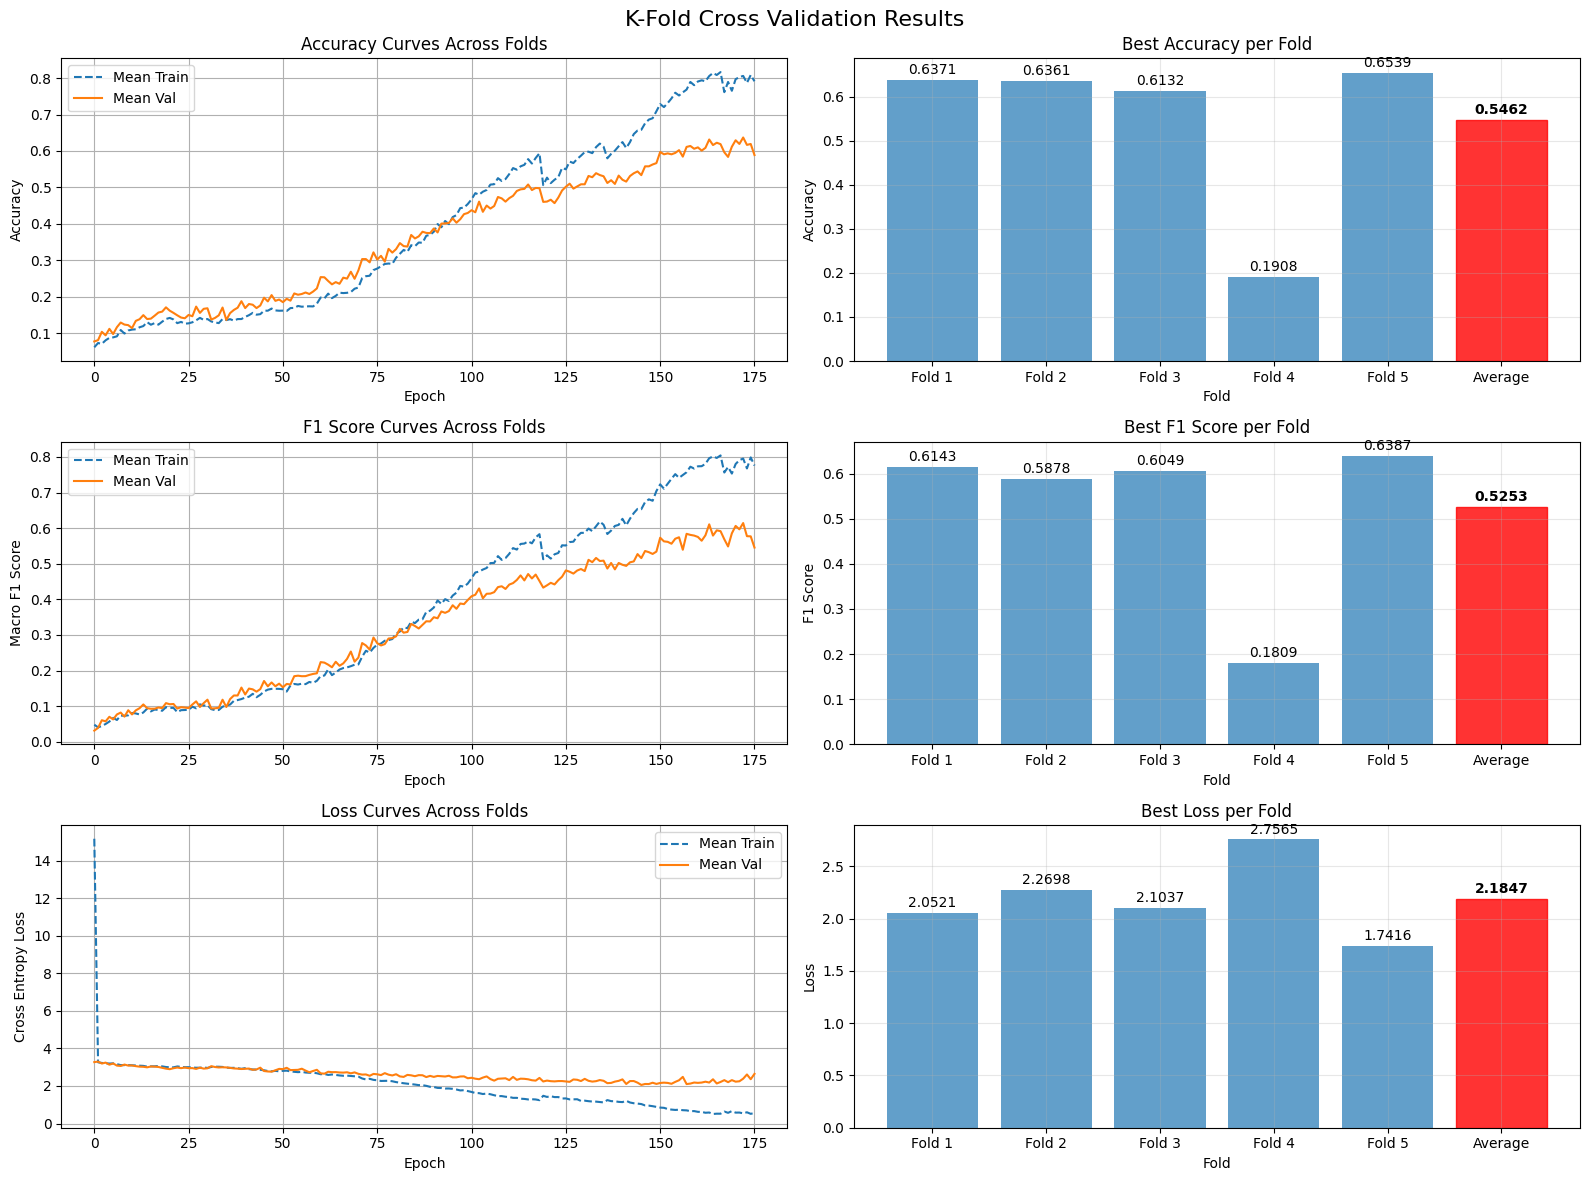

In [30]:
# Plot accuracy and loss curves
util.plot_kfold_results(results, best_results)

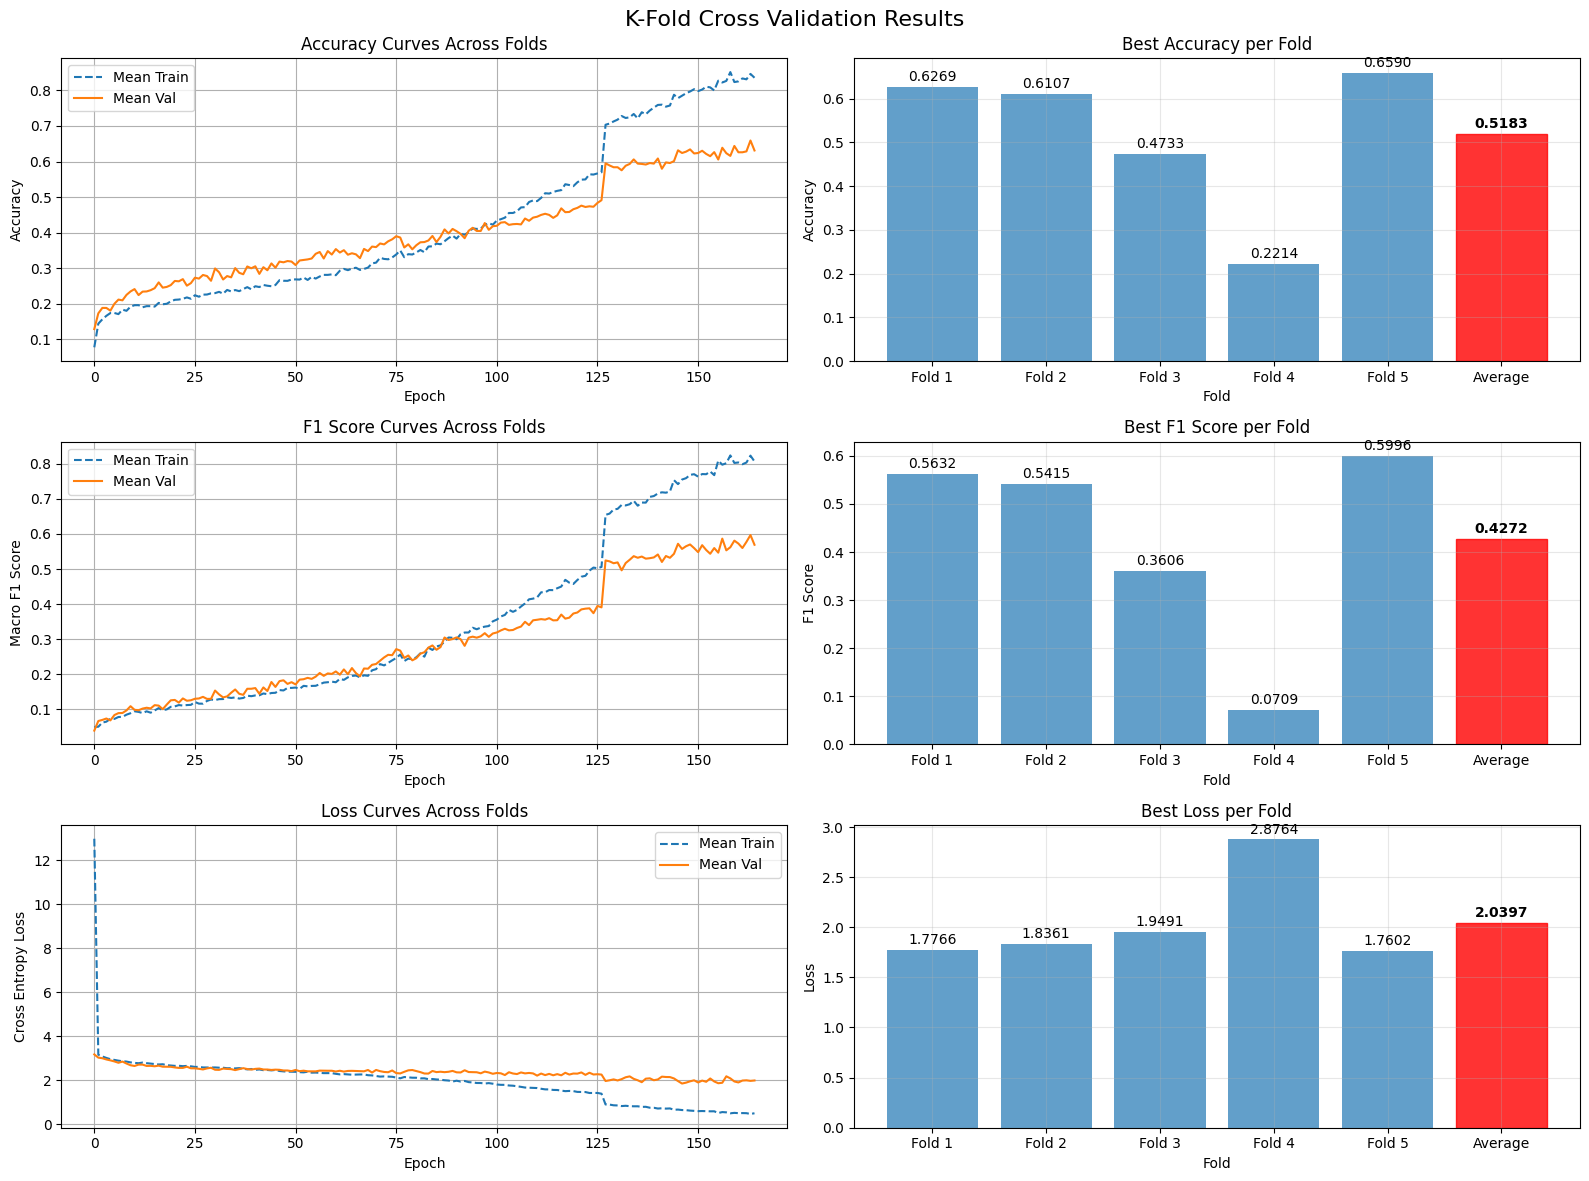

In [31]:
util.plot_kfold_results(results_unb, best_runb)

#### here be dragons




.

.

.

.

.




juanchi...

In [32]:
# import cProfile

# cProfile.run(
#     "util.k_fold_cross_validation(dataset=dataset, model_class=models.BirdCNN, num_classes=28, k_folds=5, num_epochs=250, batch_size=48, lr=0.001, aggregate_predictions=True, random_state=435, use_class_weights=True)",
#     filename="profiler/profile_output.prof"
# )

In [33]:
# Print detailed F1 results
print("F1 Score Results:")
print("="*50)

if 'aggregated_f1' in results['summary']:
    print(f"Aggregated F1 Score: {results['summary']['aggregated_f1']:.4f}")
    
print(f"Mean F1 Score: {results['summary']['mean_val_f1']:.4f} ± {results['summary']['std_val_f1']:.4f}")
print(f"Individual Fold F1 Scores: {[f'{f1:.4f}' for f1 in results['summary']['individual_f1s']]}")

# Show best F1 per fold
print("\nBest F1 per fold:")
for fold_name, fold_data in results['fold_results'].items():
    print(f"{fold_name}: {fold_data['best_val_f1']:.4f}")

F1 Score Results:
Aggregated F1 Score: 0.5125
Mean F1 Score: 0.4881 ± 0.1771
Individual Fold F1 Scores: ['0.5455', '0.5693', '0.5741', '0.1367', '0.6149']

Best F1 per fold:
fold_1: 0.6143
fold_2: 0.5878
fold_3: 0.6049
fold_4: 0.1809
fold_5: 0.6387


In [34]:
# # Select Name, Best Fold, and Model
# model_name = 'bird_cnn'
# best_model_state = results['fold_results']['fold_3']['model_state']
# model = models.BirdCNN(num_classes=28).to(device)

# # ============= Don't modify below this line ============= Ensure variables above are set correctly ============
# model.load_state_dict(best_model_state)
# model_dir = os.path.join('..', 'models')
# os.makedirs(model_dir, exist_ok=True)
# save_path = os.path.join(model_dir, f"{model_name}.pth")

# util.save_model(model, model_name, model_save_path=save_path)
# util.test_saved_model(save_path)

Call Single Model

In [35]:
# # Run single fold 80-20 training
# single_results = util.single_fold_training(
#     dataset=dataset,
#     model_class=models.BirdCNN,
#     num_classes=28,
#     num_epochs=250,
#     batch_size=48,
#     lr=0.001,
#     test_size=0.2,
#     random_state=435,
#     use_class_weights=True
# )

In [36]:
# # Plot individual training curves
# util.plot_single_fold_curve(single_results, metric_key='accuracies', title="Single Fold - Accuracy Curves", ylabel="Accuracy")
# util.plot_single_fold_curve(single_results, metric_key='losses', title="Single Fold - Loss Curves", ylabel="Cross Entropy Loss")
# util.plot_single_fold_curve(single_results, metric_key='f1s', title="Single Fold - F1 Score Curves", ylabel="Macro F1 Score")

# # Print results summary
# util.print_single_fold_results(single_results)

# # Save the trained model
# util.save_model(single_results['model'], "bird_cnn_single_fold", model_save_path=os.path.join(model_dir, "bird_cnn_single_fold.pth"))

In [ ]:
%load_ext snakeviz
%snakeviz profiler/profile_output.prof